# **8. Визуализация результатов кластеризации**

### ✍ До этого мы не только строили кластеры, но и наблюдали, как выглядят наши данные после кластеризации. Визуализация позволяет лучше понять данные и полученные результаты. В этом юните мы рассмотрим, как лучше визуализировать результаты кластеризации, и в этом вам помогут знания, полученные в модуле PY-13.

### В зависимости от количества признаков, описывающих объект, можно выделить две разновидности визуализации: 2D и 3D.

### Если объект описывается двумя признаками, например рост и вес, эти значения легко распределить по осям X и Y. Если прибавляется ещё один признак, понадобится дополнительная ось Z, и график будет трёхмерным. В зависимости от алгоритма кластеризации мы можем просто визуализировать кластеры или же нарисовать дендрограмму.

## **В данном юните мы рассмотрим следующие способы визуализации:**

+ **диаграмма рассеяния** для двухмерного и трёхмерного случаев;
+ **Convex Hull**, или выпуклая оболочка;
+ **дендрограмма**;
+ **Clustergram**.

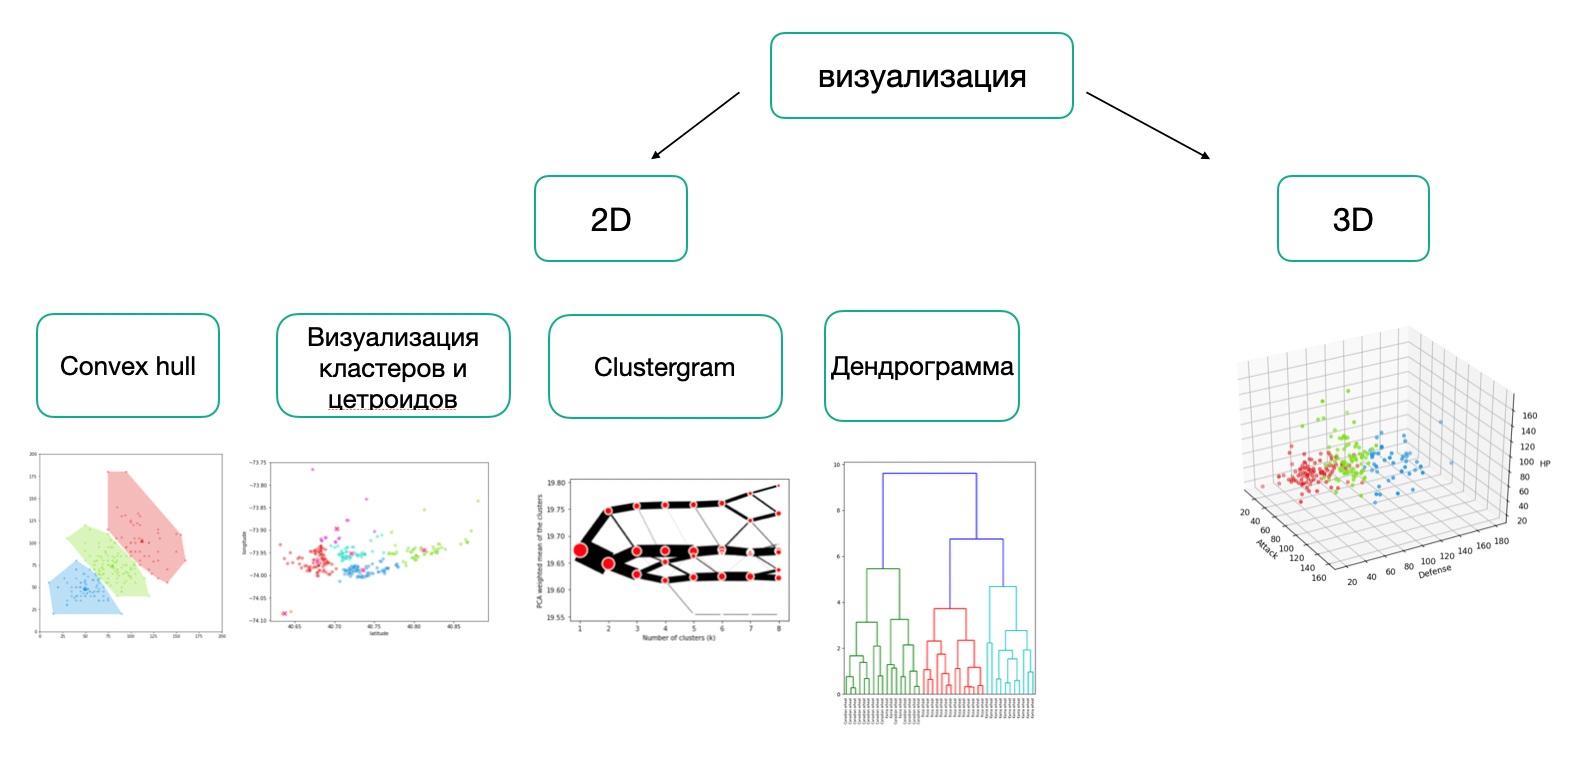

→ Рассматривать визуализацию кластеризации мы будем на примере данных об арендном жилье в Нью-Йорке, размещённом на платформе Airbnb. Нас интересуют координаты (широта и долгота) жилья, которое можно арендовать, и стоимость аренды.

Рассмотрим кластеризацию по двум признакам, а именно — выделим группы жилья по локации. К текущим признакам добавим цену и рассмотрим, как локация влияет на цену.

Загрузим данные:

In [30]:
# импортируем библиотеки, которые нам понадобятся для работы с датафреймом, кластеризацией и визуализацией
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("data/airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


В данном датасете довольно много данных, например имя арендодателя, минимальное время аренды. Нас интересуют только широта (столбец latitude) и долгота (столбец longitude), а также цена (столбец price) аренды квартиры. Визуализируем данные, основываясь на широте и долготе:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


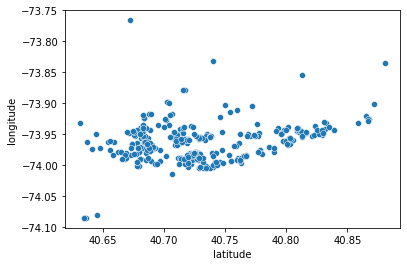

In [31]:
sns.scatterplot(df.latitude, df.longitude)

# 2D-ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ И ЦЕНТРОИДОВ

# ДИАГРАММА РАССЕЯНИЯ

Самый простой способ визуализировать получившиеся кластеры — выделить разными цветами данные, принадлежащие к разным кластерам. В этом поможет диаграмма рассеяния, на которой по двум осям откладываются значения признаков объекта. С помощью такой простой визуализации легко понять, правильно ли прошла кластеризация, действительно ли разные объекты оказались в разных классах, а похожие — в одном.

Мы с вами уже умеем визуализировать диаграммы рассеяния и выделять разными цветами данные, принадлежащие к разным кластерам. Сейчас мы повторим пройденное, а также дополнительно выделим на графике центроиды кластеров. Для этого построим модель k-means-кластеризации, выделив в данных шесть кластеров, а далее найдём центроиды и визуализируем результаты.

In [32]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions


# с помощью метода cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

Создадим новые столбцы (cen_x, cen_y, color) в датафрейме. В зависимости от значения в ячейке clusters в ячейках cen_x, cen_y и color будут разные значения: если значение в clusters — 0, в cen_x и cen_y будут указаны координаты центроида нулевого кластера и цвет нулевого кластера.

In [33]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2,40.677456,-73.970050,#2095DF
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5,40.734939,-73.988732,#DF8520
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,40.811825,-73.946625,#81DF20
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2,40.677456,-73.970050,#2095DF
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,40.811825,-73.946625,#81DF20


Мы можем просто визуализировать полученные кластеры, передав в переменную информацию о том, какой элемент к какому кластеру принадлежит. В таком случае Seaborn будет автоматически подбирать цвета для кластеров:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


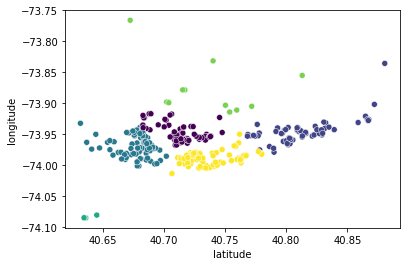

In [34]:
sns.scatterplot(df.latitude, df.longitude, c=df.clusters)

Если мы хотим задать определённые цвета для кластеров, в переменную c передадим столбец с заданными цветами:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


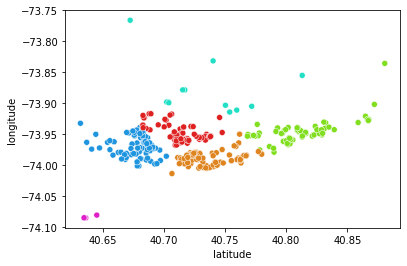

In [35]:
sns.scatterplot(df.latitude, df.longitude, c=df.color)

Если точек слишком много или мало, может понадобиться уменьшить или увеличить их размер. В этом поможет переменная s.

Также могут встретиться перекрывающиеся кластеры — а таком случае нужно, чтобы цвета объектов в кластере были полупрозрачными. В этом поможет переменная alpha: чем ближе её значение к 1, тем менее прозрачны объекты на графике.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


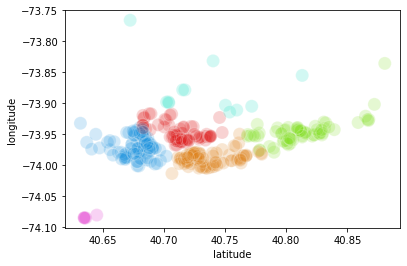

In [36]:
sns.scatterplot(df.latitude, df.longitude, c=df.color, alpha=0.2, s=170)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


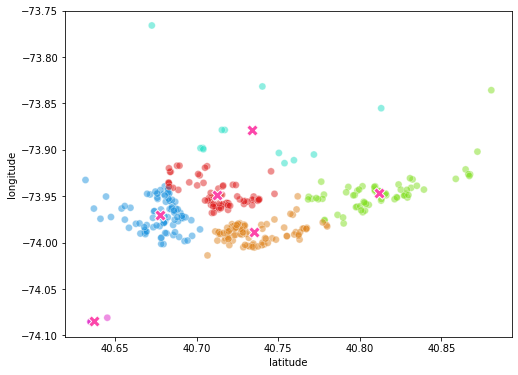

In [37]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(df.latitude, df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(centroids_x, centroids_y, marker="X", c=['#FC46AA'], s=130)

### Итак, мы визуализировали кластеры, а также отметили центроиды этих кластеров. Визуализация центроидов кластеров помогает понять, насколько элементы кластера находятся далеко или близко к центроиду. Если элемент находится далеко от центроида и от других элементов, то он сильно непохож на элементы своего кластера.

### Если в одном пространстве много скоплений точек, при визуализации мы можем увеличить прозрачность точек с помощью параметра alpha. Таким образом, тот участок, который будет насыщеннее по цвету, будет содержать больше скоплений точек.

### В данном случае мы визуализировали результаты кластеризации и можем заметить, что в целом кластеризация выглядит логичной. Также можно отметить, что в данных есть выбросы, так как есть точки, которые расположены очень далеко от центроидов кластеров.

# CONVEX HULL

В предыдущем примере оценивать размеры кластеров мы могли лишь на глаз. При рассмотрении диаграммы рассеяния вам, возможно, хотелось провести «границы» кластеров, чтобы оценить их размеры. Провести границы кластеров мы можем с помощью визуализации **выпуклых оболочек** кластеров.

## **Выпуклая оболочка (Convex Hull) множества точек** — это такое выпуклое множество точек, в котором лежат все точки фигуры.

Представьте, что по стене развешены крючки. Чтобы найти выпуклую оболочку этих крючков, необходимо взять лассо, набросить его на крючки и затянуть. Верёвка будет окружать все крючки, а касаться будет только тех, что снаружи. Петля, которая будет окружать крючки, и будет считаться выпуклой оболочкой:

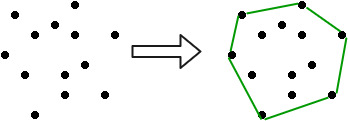

Визуализация Convex Hull помогает понять, насколько получившиеся кластеры крупные и разнообразные. Если все элементы кластера похожи друг на друга, площадь выпуклой оболочки будет маленькой, в противном случае — наоборот. Также на данной диаграмме хорошо заметны выбросы в данных. Выбросы находятся далеко от основных элементов кластера, а значит площадь выпуклой оболочки получается большой.

Для построения выпуклой оболочки каждого кластера воспользуемся библиотекой Scipy и классом ConvexHull.

Scipy можно установить следующим образом:

```
pip install scipy
```
ConvexHull принимает на вход значения признаков объектов, для которых нужно построить выпуклую оболочку. Индексы точек из points, которые образуют вершины выпуклой оболочки, можно получить с помощью метода vertices:


In [38]:
from scipy.spatial import ConvexHull 
import numpy as np

points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

array([0, 4, 3, 2], dtype=int32)

Мы получим список из значений координат [0, 4, 3, 2].

После этого мы можем найти координаты этих точек из списка points. Получим выпуклую оболочку наших кластеров:

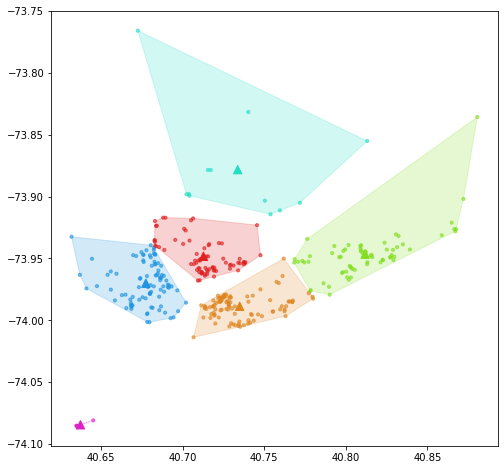

In [39]:
fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

В данном случае можно сказать, что среди элементов розового и зелёного кластеров содержатся выбросы, за счёт которых выпуклая оболочка стала большой. Элементы синего кластера наиболее похожи между собой, элементы красного довольно разнообразны относительно других кластеров.

### → Таким образом, если мы хотим лучше понять, какие данные находятся в кластерах, насколько сильно они схожи между собой или различны, на помощь придёт график Convex Hull.

Диаграмма рассеяния и Convex Hull помогают визуализировать только результаты, т. е. то, как данные разделились на кластеры. Для иерархической же кластеризации мы можем визуализировать не только полученные результаты, но и то, как данные делились на кластеры в ходе работы алгоритма. Для такой визуализации нужно использовать **дендрограммы**.

# ДЕНДРОГРАММА

## Данный способ визуализации необходим, если мы хотим визуализировать результаты иерархической кластеризации.

Из дендрограммы можно вынести много полезной информации. На дендрограмме можно:

+ наблюдать, как работал алгоритм: как объединялись (или разбивались) кластеры;
+ понять, насколько похожи соседние кластеры между собой;
+ предположить, какое количество кластеров можно было бы выбрать для кластеризации.

### Для визуализации дендрограммы нам понадобится библиотека Scipy и модули dendrogram и linkage.

linkage — это способ расчёта расстояния между двумя кластерами.

В переменной method можно задать разные способы расчёта расстояния: single, complete, average, weighted, centroid, median, ward.

Функция dendrogram строит дендрограмму, основываясь на информации о расстоянии объектов, полученной из функции linkage. Данная информация позволяет строить на дендрограмме ветви разной высоты.

Наиболее важные переменные, которые принимает функция dendrogram:

+ Z — расстояния до объектов кластеров, полученные из функции linkage.
+ orientation — ориентация дендрограммы. Данный параметр может принимать значения top, bottom, left, right.
+ labels — список с предсказаниями, к какому кластеру какой объект относится.
+ distance_sort — определяет, в каком порядке будут визуализированы кластеры: ascending или True означает, что сначала отрисовывается пара кластеров с максимальным расстоянием между ними; descending или False — что сначала отрисовывается пара кластеров с минимальным расстоянием между ними.

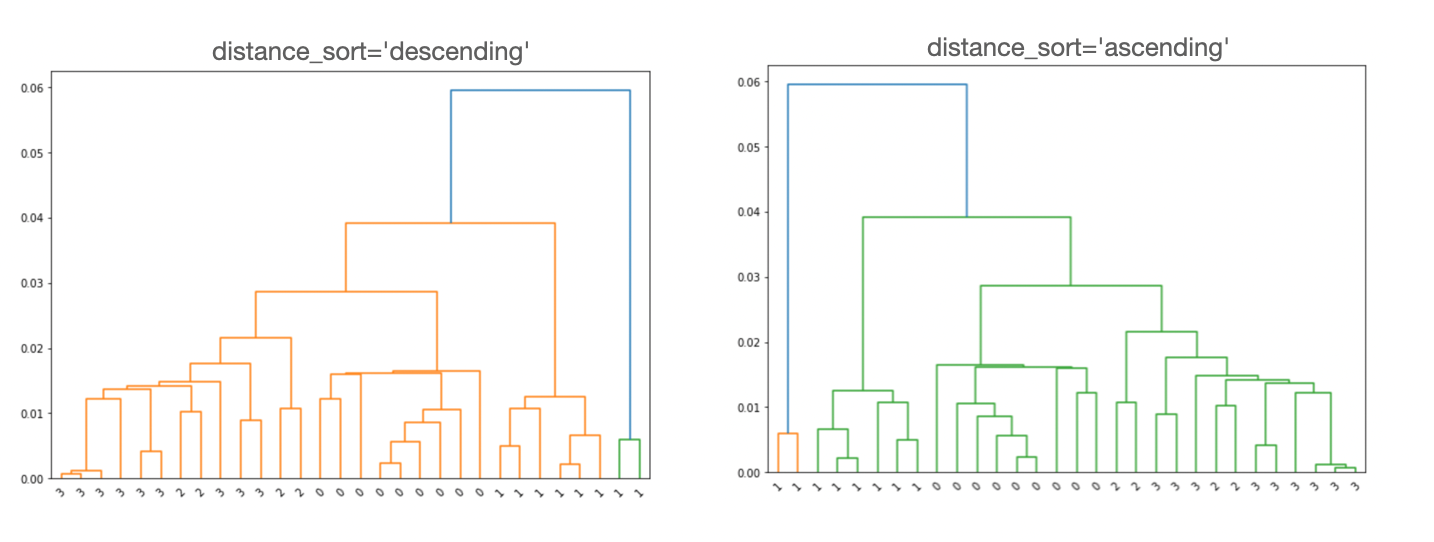

Запустим агломеративную кластеризацию на данных об аренде жилья на Airbnb в Нью-Йорке:

In [40]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

Визуализируем результаты:

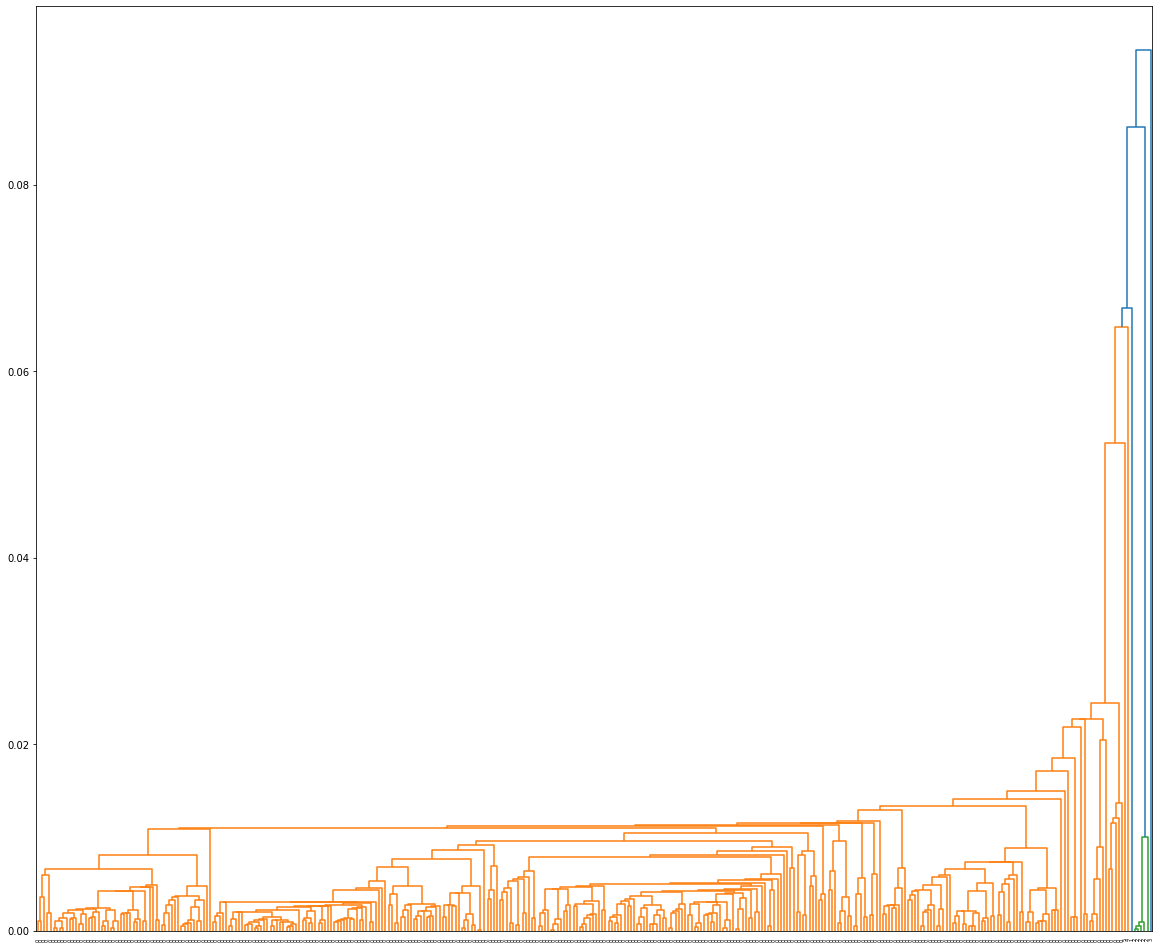

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show();

Так как данных немало, график получается несколько перегруженным. На дендрограмме можно наблюдать, как проходил процесс кластеризации: исходные элементы, находящиеся снизу, объединялись сначала в много мелких кластеров, затем эти кластеры объединялись между собой, пока в самом конце все кластеры не объединились в один большой.

Из данного графика понятно, на сколько кластеров можно разделить данные. В данном случае, основываясь на значениях расстояний между кластерами, мы можем провести мысленную горизонтальную линию и посмотреть, сколько ветвей дендрограммы она пересечёт (это количество и будет равно количеству кластеров). Например, если мы считаем, что расстояния 0.04 между кластерами достаточно для того, чтобы считать кластеризацию завершённой, данные нужно делить на шесть кластеров. На рисунке ниже мы провели мысленную горизонтальную линию на значении 0.04. Данная линия пересекла шесть ветвей дендрограммы:

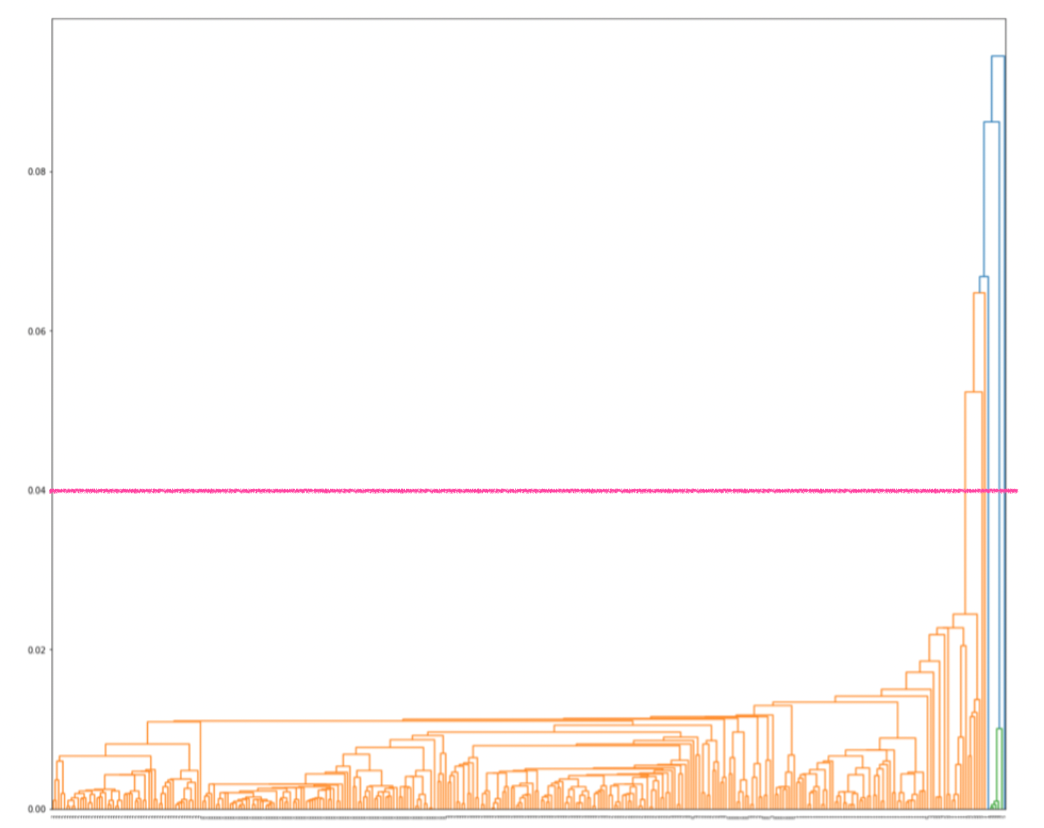

Также по дендрограмме мы можем понять, насколько кластеры похожи между собой: чем меньше высота внутренних веток, тем более похожими считаются кластеры. В нашем случае можно наблюдать, что в самом начале объекты были схожи, так как высота внутренних веток была маленькой, а далее, когда внутренних веток осталось шесть, высота стала больше, то есть кластеры стали отличаться друг от друга:

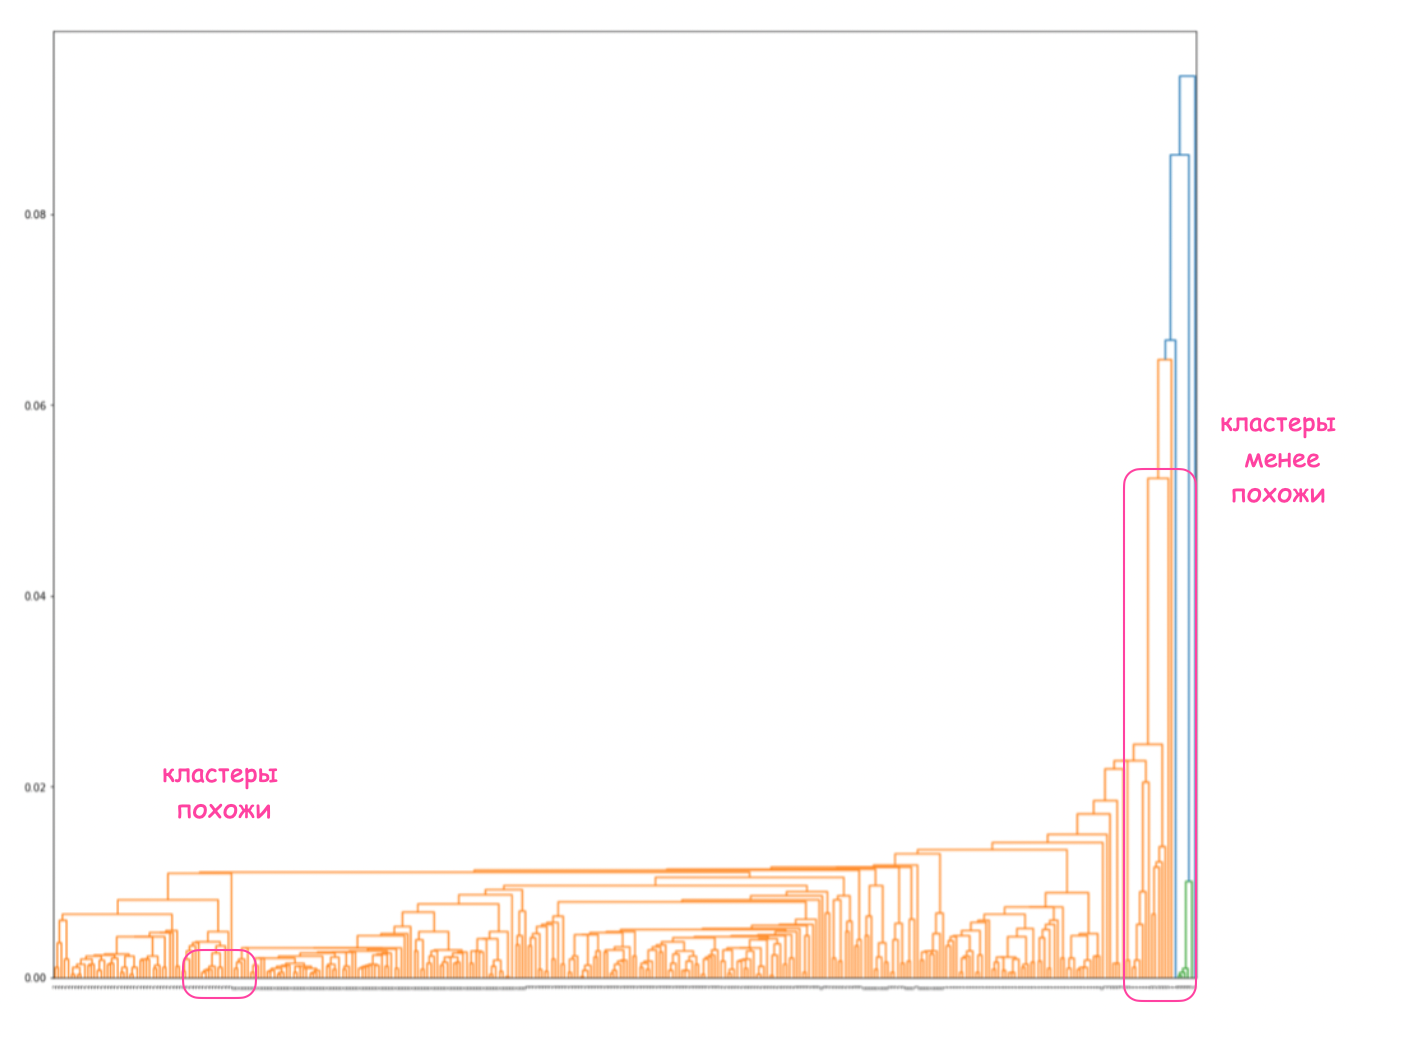

График дендрограммы получается довольно информативным, но его можно использовать только для иерархической кластеризации. Что делать, если для других видов кластеризации также хочется наблюдать, как данные делятся на два, три и более кластеров? Для этого можно использовать **Clustergram-визуализацию**.


# CLUSTERGRAM

Построение кластеров можно отследить только для иерархической кластеризации. Для k-means-кластеризации мы можем только визуализировать полученные кластеры. Однако иногда бывает интересно представить, как выглядели бы данные, если бы кластеров было, например, два, а не три.

Относительно недавно был разработан ещё один способ визуализации — **Clustergram**.

## Данная визуализация позволяет понять, что происходит с данными при разном количестве кластеров, и полезна при исследовательском анализе. Также она может быть полезна и для иерархической кластеризации, когда объектов много и дендрограмма получается сложной для понимания.

### Далее мы рассмотрим только базовые принципы Clustergram-кластеризации. Более подробную информацию можно найти тут.

### Графики Clustergram позволяют отследить, как делятся данные при разном количестве кластеров. Более того, можно оценить, в каком кластере объектов больше, а в каком — меньше.

Графики Clustergram выглядят следующим образом:

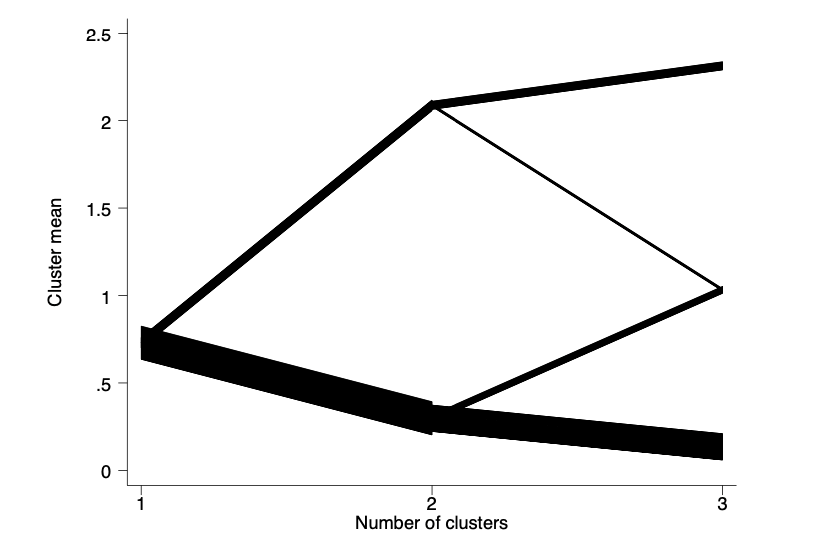

### **Как их интерпретировать?**

Изначально все наблюдения образуют единый кластер (исходные данные). После данные делятся на два кластера. При этом можно заметить, что нижняя линия толще — это означает, что во второй кластер попало больше объектов. Далее данные делятся на три кластера, при этом второй снизу кластер образуется путём слияния некоторых элементов из двух предыдущих кластеров.

### → Построить такой график можно не для всех алгоритмов кластеризации, а только для k-means, GMM и иерархической кластеризации. Метод кластеризации задаётся в поле method, по умолчанию выбрана k-means-кластеризация.

Установить данную библиотеку можно через pip:

In [42]:
#pip install clustergram

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Попробуем визуализировать данные:

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.035565853118896484 seconds.
K=3 fitted in 0.038419246673583984 seconds.
K=4 fitted in 0.030539512634277344 seconds.
K=5 fitted in 0.03749728202819824 seconds.
K=6 fitted in 0.04547286033630371 seconds.
K=7 fitted in 0.04615330696105957 seconds.
K=8 fitted in 0.05205726623535156 seconds.


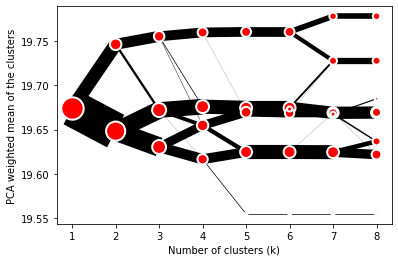

In [43]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans')

# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

На данном графике мы можем наблюдать, как изменяются данные в ходе кластеризации. Сначала один кластер разделился на два. При этом эти кластеры неравномерные: в нижнем кластере данных существенно больше (так как нижняя линия значительно толще), чем в верхнем. Далее данные делятся на три кластера, при этом количество объектов в двух кластерах примерно одинаковое, а в третьем, верхнем, кластере объектов всё ещё меньше. Таким образом мы можем оценивать равномерность получившихся кластеров.

# **3D-ВИЗУАЛИЗАЦИЯ**

Если кластеризация проводится не в двухмерном пространстве (по двум признакам), а в трёхмерном, для того, чтобы визуально оценить её результаты, необходимо проводить визуализацию в 3D-пространстве. В этом нам поможет библиотека Matplotlib или Plotly. 

Выше мы рассматривали кластеризацию в двухмерном пространстве и кластеризовали жильё в Нью-Йорке, представленное для аренды на Airbnb, основываясь на широте и долготе. Теперь давайте добавим третий признак — суточную стоимость аренды (поле price в датафрейме).

Чтобы визуализировать результаты 3D-кластеризации, её необходимо сначала провести:

In [44]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

Визуализация с помощью библиотеки Matplotlib:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 0, 'price')

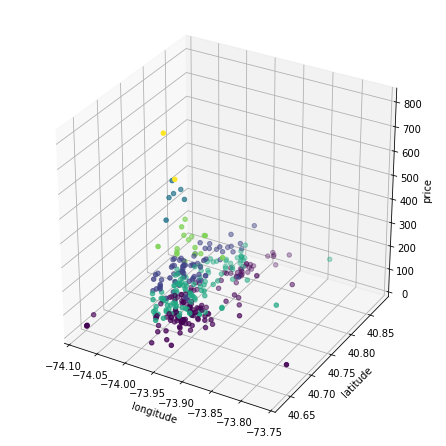

In [45]:
from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Однако при визуализации с этого ракурса не очень понятно, где находится зелёная точка, — кажется, что она потерялась среди синих:

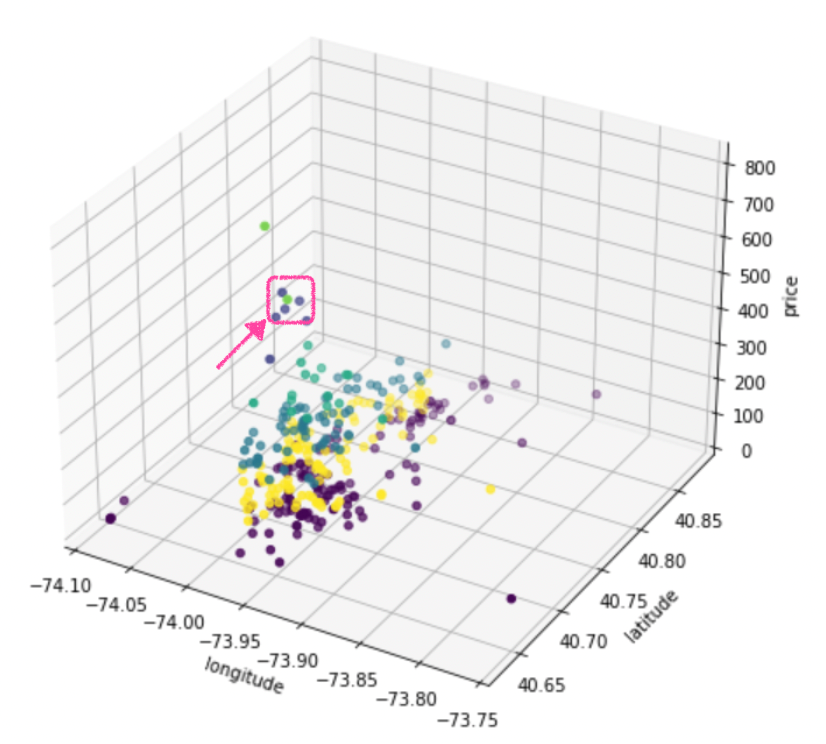

Чтобы изменить угол обзора, существует два параметра:

+ ax.azim — куб будет вращаться слева направо в зависимости от изменения этой величины;
+ ax.elev — куб будет вращаться снизу вверх в зависимости от изменения данной величины.

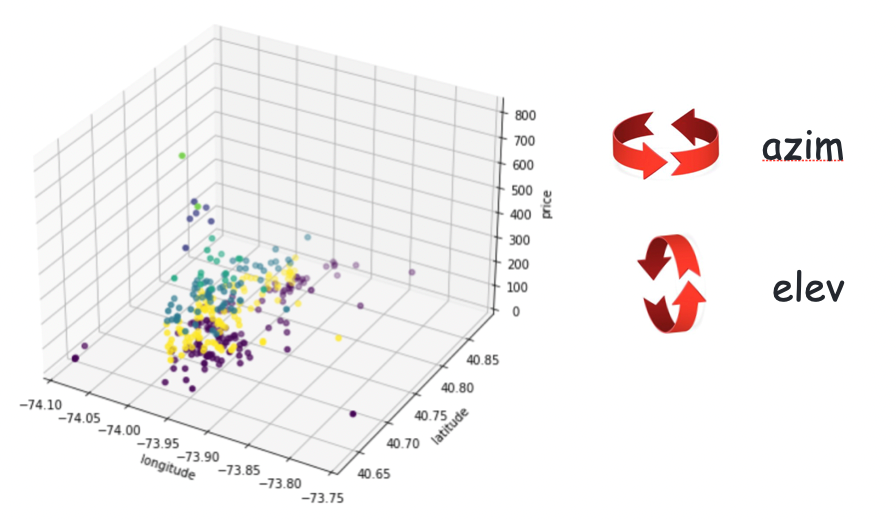

Изменим угол визуализации: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 0, 'price')

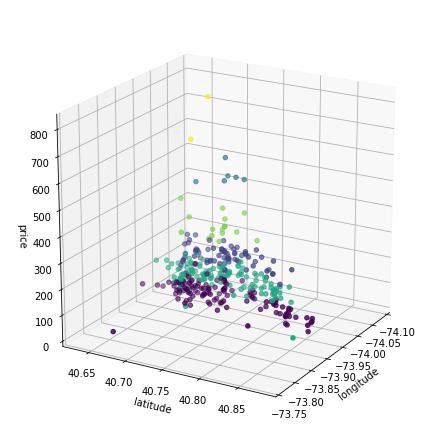

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавляем дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Теперь, если рассматривать график под другим углом, мы видим, что на самом деле зелёная точка не потерялась среди элементов другого кластера. Данные в трёхмерном пространстве образовали чёткие кластеры, и в основном они основываются на цене арендных квартир. Внизу мы видим фиолетовый кластер с самыми дешёвыми квартирами, а наверху — сиреневый и зелёный кластеры с самыми дорогими. При этом они, по всей видимости, располагаются в одном районе, так как значения широты и долготы довольно близкие.

### → Таким образом, при статической визуализации 3D-пространства бывает полезно рассмотреть график с нескольких сторон, чтобы однозначно оценить результаты кластеризации.

Хоть мы и получили нужную информацию из предыдущей визуализации, но было не совсем удобно каждый раз задавать для 3D-графика параметры обзора. Было бы идеально сделать график интерактивным, чтобы один раз провести визуализацию, а затем самим поворачивать график, как нам удобно. В этом поможет Plotly:

In [48]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

Анализируя результаты кластеризации, полученные с помощью Plotly, можно прийти к тем же выводам, которые мы сделали до этого. Но в данном случае мы можем интерактивно рассматривать график, а это намного удобнее.

## → В данном юните мы рассмотрели разные способы визуализации кластеров. На практике вы, скорее всего, будете чаще пользоваться диаграммой рассеяния для быстрой визуальной проверки результатов кластеризации для двухмерного и трёхмерного случаев.

Подведём общий итог и соберём все способы визуализации кластеров в сводную таблицу, чтобы понять, какую визуализацию следует использовать в зависимости от целей и используемых алгоритмов кластеризации.


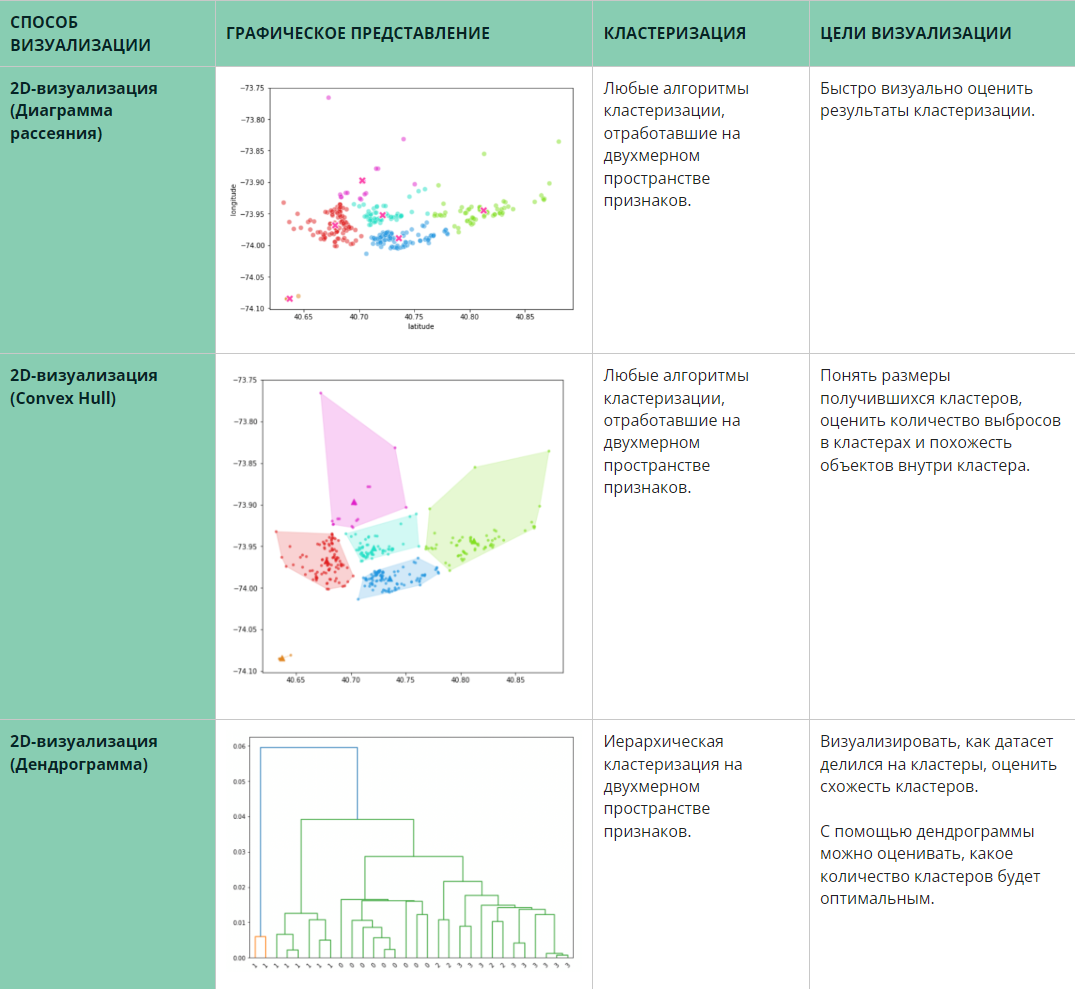

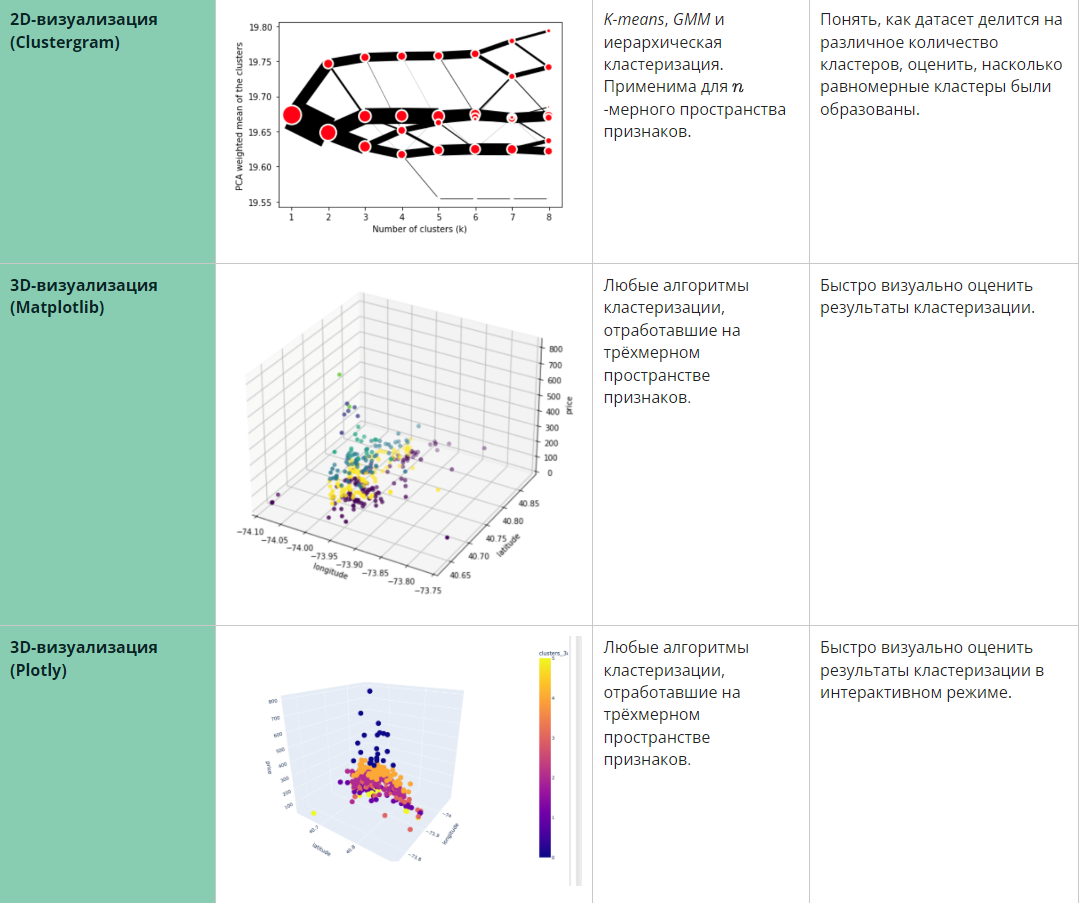

## Задание 8.1

Выберите график, на котором изображён Convex Hull:

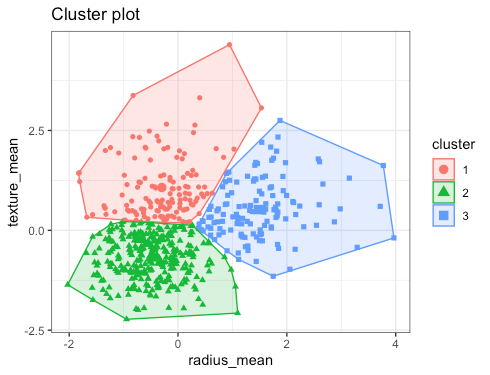+

## Задание 8.2

Результаты какой кластеризации можно визуализировать в виде дендрограммы?

+ Иерархической

## Задание 8.3

Если кластеризация была проведена по трём признакам объектов, для визуализации результатов нужно использовать...

+ 3D-визуализацию

## Задание 8.4

Для датасета Airbnb проведите иерархическую алгомеративную кластеризацию с использованием sklearn. В качестве признаков для кластеризации используйте latitude и longitude из датафрейма, количество кластеров для кластеризации — 6. Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.

Визуализируйте дендрограмму для проведённой кластеризации. На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?

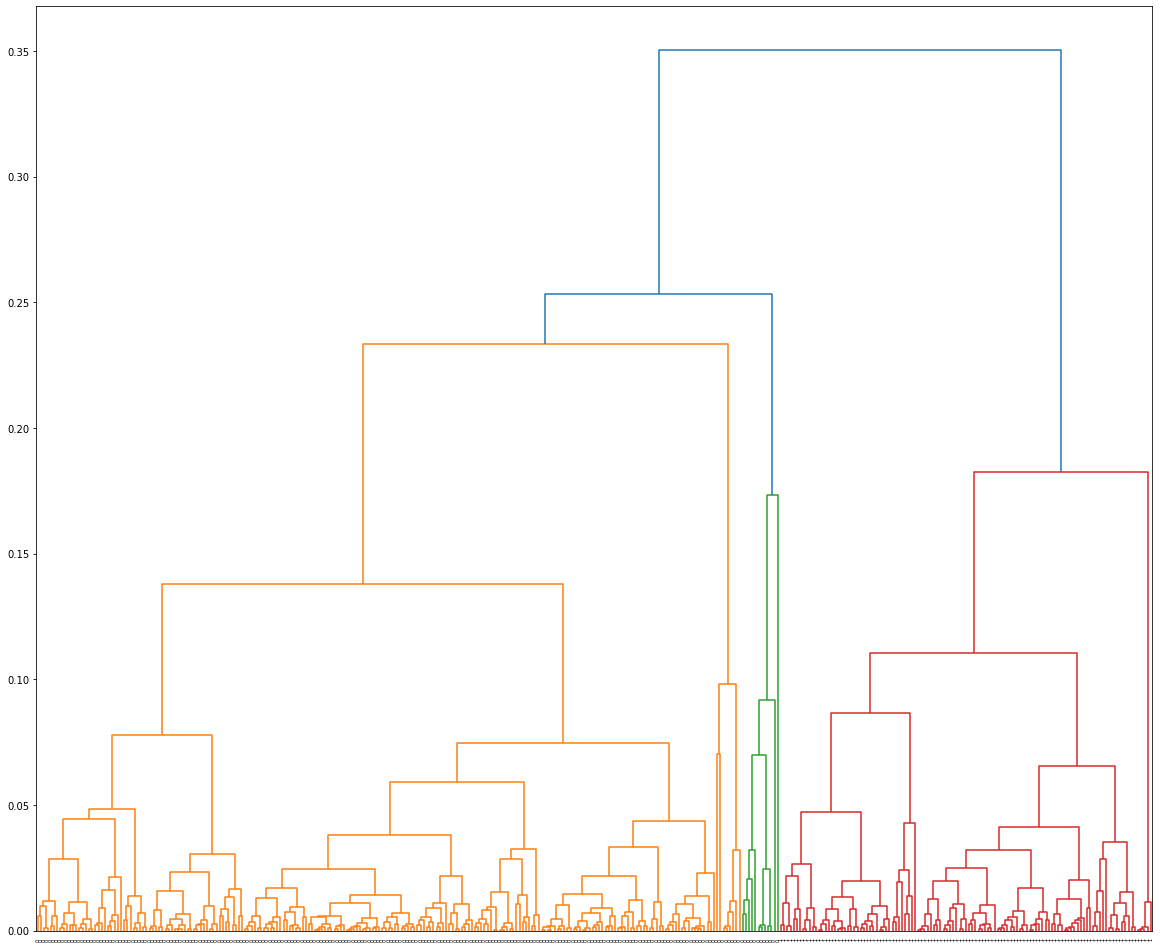

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

# запускаем агломеративную кластеризацию c подсчётом расстояния методом полной связи
agglomerative_clustering = AgglomerativeClustering(linkage='complete')
# обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']], )
# рассчитываем расстояния между кластерами с использованием метода полной связи
linked = linkage(df[["latitude", "longitude"]], 'complete')
plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

## Задание 8.5

Для датасета Airbnb проведите DBSCAN-кластеризацию. В качестве признаков для кластеризации используйте latitude и longitude. Параметры для алгоритма кластеризации: eps=0.012, min_samples=6.

Визуализируйте результаты. При визуализации используйте distance_sort=descending. Сколько кластеров получилось на графике?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



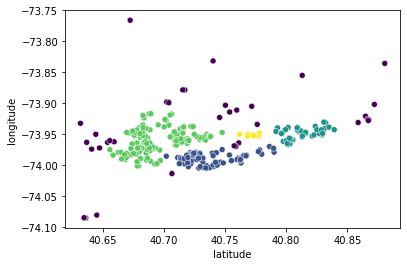

In [50]:
from sklearn.cluster import DBSCAN

dbscan_clus = DBSCAN(eps=0.012, min_samples=6)
dbscan_clus.fit_predict(df[['latitude', 'longitude']])

sns.scatterplot(df.latitude, df.longitude, c=dbscan_clus.fit_predict(df[['latitude', 'longitude']]))